## Assignment 1
## Guru Charan

Assignment 1 CSCN8000 Artificial Intelligence Algorithms and Mathematics

1. Given the symptoms exhibited in a patient and a database of anonymized patient records, predict whether the patient is likely to have an illness (Parkinson’s disease). A model of this decision problem could be used by a program to provide decision support to medical professionals.

In [41]:
#import packages
import matplotlib.pylab as plt
import pandas as pd

In [42]:
diseaseDF = pd.read_csv("../../../Csv/pd_speech_features.csv", skiprows=1)
#Skip the first while reading the dataset because it is not useful as column header.

In [43]:
display(diseaseDF)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


In [44]:
diseaseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


Total **756** rows and **755** columns

In [45]:
diseaseDF.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


## Column name Class is the dependant variable here. It consists of 2 values either 0 or 1. If it is 0 no disease, if it 1 it means disease is present. 

Lets clean the data

In [46]:
print(diseaseDF.drop_duplicates())
print(diseaseDF.isnull().sum())
print(diseaseDF.empty)

      id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses   
0      0       1  0.85247  0.71826  0.57227        240               239  \
1      0       1  0.76686  0.69481  0.53966        234               233   
2      0       1  0.85083  0.67604  0.58982        232               231   
3      1       0  0.41121  0.79672  0.59257        178               177   
4      1       0  0.32790  0.79782  0.53028        236               235   
..   ...     ...      ...      ...      ...        ...               ...   
751  250       0  0.80903  0.56355  0.28385        417               416   
752  250       0  0.16084  0.56499  0.59194        415               413   
753  251       0  0.88389  0.72335  0.46815        381               380   
754  251       0  0.83782  0.74890  0.49823        340               339   
755  251       0  0.81304  0.76471  0.46374        340               339   

     meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...   
0            0.008064  

No null or blank or duplicates rows found are found

In [47]:
#Group by gnder 
# 0 represnts male and 1 represents as female
genderGroupby = diseaseDF.groupby("gender")['class'].sum().reset_index()
genderGroupby = genderGroupby

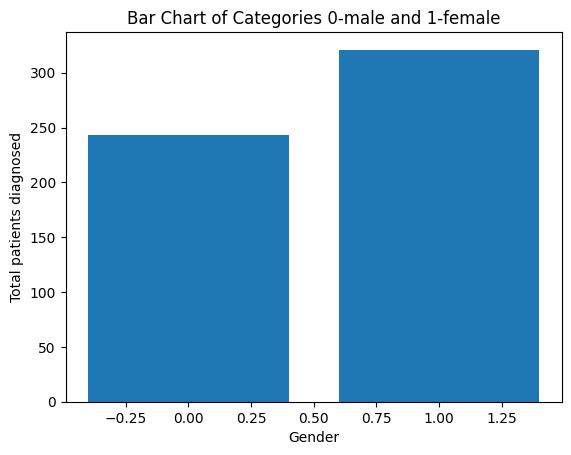

In [48]:
# Create the bar chart
plt.bar(genderGroupby['gender'], genderGroupby['class'])

plt.xlabel('Gender')
plt.ylabel('Total patients diagnosed')
plt.title('Bar Chart of Categories 0-male and 1-female')

# Show the plot
plt.show()


Looks like women are diagnosed more than men 

But lets check the ratio for both of them, because we are not considering equal size in dataset

In [49]:
# Group the data by 'Category' and 'Subcategory' columns and get the count for each group
grouped_data = diseaseDF.groupby(['gender', 'class']).size().reset_index(name='Count')

# Replace values with their categories for understanding
grouped_data['gender'] = grouped_data['gender'].replace(0, 'Male')
grouped_data['gender'] = grouped_data['gender'].replace(1, 'Female')

grouped_data['class'] = grouped_data['class'].replace(0, 'Not_diagnosed')
grouped_data['class'] = grouped_data['class'].replace(1, 'Diagnosed')
grouped_data

,gender,class,Count
0,Male,Not_diagnosed,123
1,Male,Diagnosed,243
2,Female,Not_diagnosed,69
3,Female,Diagnosed,321


([<matplotlib.patches.Wedge at 0x2a22845f910>,
 [Text(-0.5380815169042071, 0.9594103820399629, 'Male_Not_diagnosed'),
  Text(-0.9850389076642474, -0.4895899819110134, 'Male_Diagnosed'),
  Text(0.20450278113079662, -1.0808231180492809, 'Female_Not_diagnosed'),
  Text(1.0692859543286173, 0.25812312541796506, 'Female_Diagnosed')],
 [Text(-0.2934990092204766, 0.5233147538399797, '16.3%'),
  Text(-0.537293949635044, -0.2670490810423709, '32.1%'),
  Text(0.11154697152588905, -0.5895398825723349, '9.1%'),
  Text(0.5832468841792456, 0.14079443204616274, '42.5%')])

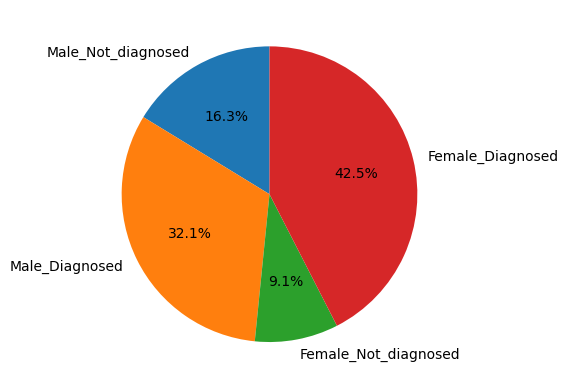

In [50]:
# Draw pie chart to see the perncentage of distribution
plt.pie(grouped_data['Count'], labels=grouped_data['gender'] + "_"+ grouped_data['class'], autopct='%1.1f%%', startangle=90)

* Female Diagnosed more compare to male diagnosed with this disease

In [51]:
groupIDData = diseaseDF.groupby(["id", "class"]).size().reset_index(name="Count")
groupIDData.head(25)

,id,class,Count
0,0,1,3
1,1,1,3
2,2,1,3
3,3,1,3
4,4,1,3
5,5,1,3
6,6,1,3
7,7,1,3
8,8,1,3
9,9,1,3


In [52]:
#drop unnecessary features
diseaseDF_target = diseaseDF["class"]
print(diseaseDF_target)
X_diseaseDF = diseaseDF.drop(["class", "id"], axis=1)
print(X_diseaseDF)

0      1
1      1
2      1
3      1
4      1
      ..
751    0
752    0
753    0
754    0
755    0
Name: class, Length: 756, dtype: int64
     gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses   
0         1  0.85247  0.71826  0.57227        240               239  \
1         1  0.76686  0.69481  0.53966        234               233   
2         1  0.85083  0.67604  0.58982        232               231   
3         0  0.41121  0.79672  0.59257        178               177   
4         0  0.32790  0.79782  0.53028        236               235   
..      ...      ...      ...      ...        ...               ...   
751       0  0.80903  0.56355  0.28385        417               416   
752       0  0.16084  0.56499  0.59194        415               413   
753       0  0.88389  0.72335  0.46815        381               380   
754       0  0.83782  0.74890  0.49823        340               339   
755       0  0.81304  0.76471  0.46374        340               339   

     mean

In [53]:
#Standardizing the feature
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_standardized = scaler.fit_transform(X_diseaseDF.drop(["gender"], axis=1))

# Convert the standardized array back to a DataFrame
diseaseDF_Standardized = pd.DataFrame(X_standardized, columns=X_diseaseDF.drop("gender", axis=1).columns)
diseaseDF_Standardized

,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,0.627644,0.256144,0.605835,-0.846892,-0.842373,0.933328,-0.407251,-0.054993,0.037843,0.066329,...,-0.445877,-0.584822,-0.619412,-0.576762,-0.482286,-0.399331,-0.484533,-0.775137,-0.814727,-0.366595
1,0.121620,-0.080433,0.368415,-0.907404,-0.902773,1.040014,-0.426092,-0.142570,-0.027698,-0.086722,...,-0.445730,-0.584895,-0.589778,0.193084,0.016183,-0.067120,-0.175566,-0.526647,-0.582972,0.400396
2,0.617950,-0.349839,0.733609,-0.927575,-0.922907,1.084576,-0.443557,-0.214916,-0.088871,-0.035705,...,-0.446030,-0.584767,-0.629033,-0.356261,-0.156055,-0.067593,-0.463462,-0.756063,-0.804390,-0.780935
3,-1.980560,1.382279,0.753631,-1.472186,-1.466513,2.464215,-0.275316,0.710353,1.256919,0.903010,...,-0.321598,-0.532242,-0.591137,-0.522406,0.008400,-0.449894,-0.470865,-0.633475,-0.588387,-0.801583
4,-2.472989,1.398068,0.300123,-0.887233,-0.882640,0.987044,3.143597,1.152045,1.178269,1.076468,...,-0.300835,-0.475545,-0.521356,-0.490090,-0.404833,-0.249678,-0.042021,-0.419354,-0.672216,-0.741477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0.370878,-1.964406,-1.494032,0.938221,0.939445,-0.949508,-0.454833,-0.641378,-0.601407,-0.535673,...,-0.402551,-0.549067,-0.607926,-0.606048,-0.568065,-0.485855,-0.541021,-0.726748,-0.800868,-0.719532
752,-3.460449,-1.943738,0.749044,0.918050,0.909245,-0.991826,-0.224083,-0.340570,-0.447165,-0.454045,...,-0.030964,-0.575143,-0.646996,-0.656733,-0.567791,-0.389427,-0.496835,-0.540668,-0.266633,-0.089572
753,0.813362,0.329201,-0.152220,0.575147,0.577042,-0.707165,-0.385449,-0.595685,-0.562082,-0.505063,...,2.661752,0.600185,0.663206,0.296651,-0.377602,-0.526610,-0.602494,-0.716743,-0.790177,-0.772873
754,0.541051,0.695920,0.066780,0.161646,0.164304,-0.373097,-0.450845,-0.534762,-0.502220,-0.443842,...,-0.356701,-0.167720,-0.306983,-0.377910,-0.582427,-0.577843,-0.637378,-0.771325,-0.826319,-0.811732


In [74]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features to have zero mean and unit variance
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Create a PCA object and specify the number of components you want to keep
n_components = 5  # Choose the number of components (you can experiment with different values)
pca = PCA(n_components=n_components)

# Apply PCA to the scaled features
X_reduced = pca.fit_transform(X_standardized)

# Convert the reduced data to a new DataFrame if needed
df_reduced = pd.DataFrame(X_reduced, columns=[f'PC{i+1}' for i in range(n_components)])
df_reduced

,PC1,PC2,PC3,PC4,PC5
0,-9.987960,1.488596,-6.841435,-0.819088,-3.401357
1,-10.577597,1.604491,-6.826496,1.382968,-3.173528
2,-13.474037,-1.214793,-6.809951,1.379913,-2.256580
3,-9.166986,9.011699,15.264942,-4.011613,-5.095258
4,-6.799018,4.770295,15.623075,-5.837573,-5.737333
...,...,...,...,...,...
751,22.322695,6.366099,1.447497,11.241219,-4.914767
752,13.401160,1.414283,9.345532,8.865584,-4.017836
753,8.229822,2.380675,-0.926426,-2.112181,-1.019939
754,3.981909,5.440415,-0.876574,-3.890802,0.278429


In [54]:
#Lets split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diseaseDF_Standardized, diseaseDF_target, test_size=0.2, random_state=56)

In [55]:
print(y_train)
print(X_train.shape)

534    0
741    1
755    0
616    1
234    0
      ..
235    0
418    1
192    1
399    1
484    1
Name: class, Length: 604, dtype: int64
(604, 752)


In [63]:
#Now train the model
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

d:\Conestoga\MachineLearninigIntro\Week2\CSCN8010\venv\CSCN8010_classic_ml\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
#Do predictions
y_pred = model.predict(X_test)

In [65]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
      dtype=int64)

In [66]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print('Accuracy: %.3f' % acc)

Accuracy: 0.862


Accuracy of 0.88 is considered good

Do Cross Validation to verify it is not overfitting

In [69]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

logisticmodel = LogisticRegression()
logisticmodel.fit(diseaseDF_Standardized, diseaseDF_target)

d:\Conestoga\MachineLearninigIntro\Week2\CSCN8010\venv\CSCN8010_classic_ml\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
import numpy as np
def k_fold_cross_validation(X, y, k):
    # Create KFold cross-validation object
    kf = KFold(n_splits=k, shuffle=True, random_state=56)
    # Perform cross-validation
    scores = cross_val_score(model, X, y, cv=kf)
    return scores

# Call the function with your data and desired number of folds (e.g., k=5)
scores = k_fold_cross_validation(diseaseDF_Standardized, diseaseDF_target, k=5)

# Print the accuracy for each fold
for i, score in enumerate(scores):
    print(f"Fold {i+1} - Accuracy: {score:.2f}")

# Print the mean and standard deviation of accuracies
print(f"Mean Accuracy: {np.mean(scores):.2f}")

d:\Conestoga\MachineLearninigIntro\Week2\CSCN8010\venv\CSCN8010_classic_ml\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Conestoga\MachineLearninigIntro\Week2\CSCN8010\venv\CSCN8010_classic_ml\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver 

Fold 1 - Accuracy: 0.86
Fold 2 - Accuracy: 0.81
Fold 3 - Accuracy: 0.82
Fold 4 - Accuracy: 0.85
Fold 5 - Accuracy: 0.84
Mean Accuracy: 0.84


d:\Conestoga\MachineLearninigIntro\Week2\CSCN8010\venv\CSCN8010_classic_ml\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[ 25   9]
 [ 12 106]]


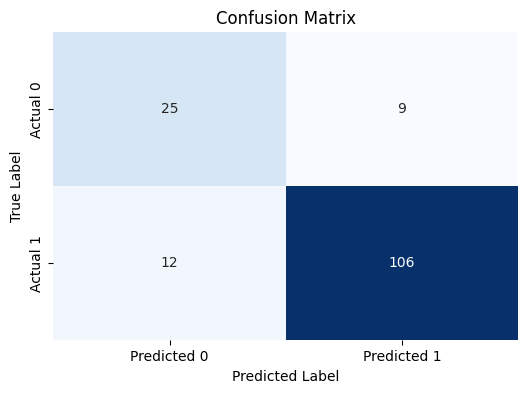

In [80]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The resulting heatmap will show the confusion matrix with color-coded cells, where the intensity of the color represents the number of instances in each cell. This visualization allows you to quickly identify patterns of correct and incorrect predictions

In [71]:
# Example of predicting one instance from the dataset
oneInstance = X_standardized[109].reshape(1, -1)
prediction = svmmodel.predict(oneInstance)

if prediction[0] == 1:
    print("Patient is likely to have Parkinson's disease.")
else:
    print("Patient is not likely to have Parkinson's disease.")

Patient is likely to have Parkinson's disease.


d:\Conestoga\MachineLearninigIntro\Week2\CSCN8010\venv\CSCN8010_classic_ml\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
